## Gotcha [^gotcha]

[^gotcha]: [Gotcha (programming)](https://en.wikipedia.org/wiki/Gotcha_(programming)

먼저 심파이에 관해 명확히 하자.
심파이는 `NumPy`, `Django`, 좀더 심하게는 `sys`, `re` 같은 표준 파이썬 라이브러리 모듈처럼 파이썬 라이브러리에 불과하다.
이것이 의미하는 바는 심파이라고 해서 특별히 파이썬 언어에 무언가를 추가하는 것이 없다.
파이썬 언어가 상속한 한계를 심파이에 그래도 상속된다.
이러한 점이 또한 심파이를 가능하면 언제라도 파이썬 관용구를 사용할 수 있게 해서,
파이썬 프로그래밍에 이미 친숙한 누구나 쉽게 심파이로 프로그래밍을 가능케 한다.
간단한 예제로, 심파이는 표현식을 만들어 내는데 파이썬 구문을 사용한다.
암묵적 곱셈(`3x` 혹은 `3 x`처럼)은 파이썬에서 허용되지 않는데, 심파이에서도 따라서 허용되지 않는다.
`3`에 `x`를 곱하려면, `*`을 넣어 `3*x`를 타이핑해야 된다.

### 기호

위와 같은 결과로 파이썬을 이용가능한 어떤 환경에도 심파이를 사용할 수 있게 된다.
다른 파이썬 라이브러리를 가져오듯이, 단지 가져오기(import)만 하면 된다.

In [38]:
from sympy import *
init_printing(use_unicode=True)

상기 명령어를 통해서 인터랙티브 파이썬 세션으로 심파이에 있는 모든 함수와 클래스를 가져온다.
이제 계산을 시작한다고 가정해보자.

In [39]:
x + 1

이럴 수가! 변수 `x`를 사용하려고 했지만, `x`가 정의되지 않았다는 응답이 시스템에서 나왔다.
파이썬에서 변수가 정의되기 전까지 변수는 어떤 의미를 갖지 않는다.
심파이도 다른 것이 없다.
아마도 이미 사용해봤을 다른 기호조작시스템과 달리, 심파이에서 변수는 자동으로 정의되지 않는다.
변수를 정의하려면, `symbols` 함수를 사용해야 한다.

In [40]:
x = symbols('x')
x + 1

`symbols` 함수는 공백 혹은 콤마로 구분되는 변수명 문자열을 받아 이것으로부터 기호를 생성한다.
그리고 나서 이것에 변수명을 대입한다.
나중에 이 이슈에 대한 해결책으로 활용할 수 있는 편리한 방식을 살펴볼 것이다.
지금 당장은, 이번 절에서 사용할 `x`, `y`, `z` 변수명을 정의만 한다.

In [41]:
x, y, z = symbols('x y z')

마지막으로 언급할 내용은, 대입되는 기호명과 변수명이 서로 관련될 필요는 없다는 점에 주목한다.

In [42]:
a, b = symbols('b a')

In [43]:
a

In [44]:
b

`a` 명칭을 갖는 기호에 변수 `b`를 대입하고, `b` 명칭 기호에 `a` 변수를 대입해서 매우 혼동스럽게 만들었다.
이제 `a`라고 불리는 파이썬 변수는 `b`라는 이름을 갖는 심파이 기호를 지칭하고, `b`도 마찬가지다.
매우 혼동스럽다. 다음과 같이 작업을 했을 수도 있다.

In [45]:
crazy = symbols('unrelated')
crazy + 1

상기 예제를 통해서 기호는 원한다면 문자 1개보다 더 긴 장문의 명칭을 가질 수 있다는 것을 알 수 있다.

일반적으로, 모범사례로 기호를 동일한 파이썬 명칭을 갖는 변수로 대입하는 것이다.
물론 예외는 있다: 기호 명칭은 파이썬 변수에서 허용되지 않는 문자를 포함하거나, 장문의 명칭을 갖는 기호를 
문자 하나 파이썬 변수로 대입해서 긴 명칭을 타이핑하는 것을 회피하기도 한다.

혼동을 회피하고자, 기호명칭과 파이썬 변수명은 항상 일치시킨다. 더 나아가, ''기호(Symbol)''라는 단어는 심파이 기호를 
''변수(variable)''이라는 단어는 파이썬 변수를 지칭한다.

마지막으로, 심파이 기호와 파이썬 변수 차이를 이해했는지 확실히 하자.
다음 상황을 고려해본다:

In [46]:
x = symbols('x')
expr = x + 1
x = 2
print(expr)

x + 1


`x`를 `2`로 바꾸는 것은 `expr`에 어떤 영향도 없다.
`x=2`를 통해 파이썬 변수 `x` 가 `2`로 바뀌지만, `expr`을 생성하는데 사용된 심파이 기호 `x`에는 영향이 없다.
`expr`을 생성할 때, 파이썬 변수 `x`는 기호다. 
기호를 생성한 뒤에 파이선 변수 `x`를 2로 변경했다. 하지만, `expr`은 동일하게 남아있다.
이런 동작사례는 심파이에만 유일무이한 것은 아니다.
모든 파이썬 프로그램이 이런 방식으로 동작한다: 변수를 변경하면, 해당변수로 이미 생성된 표현식은 자동으로 변경되지 않는다. 예를 들어,

In [47]:
x = 'abc'
expr = x + 'def'
expr

'abcdef'

In [48]:
x = 'ABC'
expr

'abcdef'

상기 예제에서, `expr`이 새로운 `x` 값으로 하려면, `expr`로 생성된 코드를 재평가할 필요가 있다. 즉, `expr = x + 1`.
`expr`이 여러 줄에 걸쳐 있다면 난잡할 수도 있다.
심파이 같은 기호계산시스템을 사용하는 장점중 하나는 `expr`에 대한 기호표현을 하고나서 `x`를 해당 값으로 치환한다.
심파이에서 이런 작업을 수행하는 올바른 방식은 `subs` 메쏘드를 사용하는 것으로 나중에 좀더 자세히 다뤄질 것이다.

In [49]:
x = symbols('x')
expr = x + 1
expr.subs(x, 2)

> ### 급 도움말 {.callout}
> 
> 표현식에 포함된 기호값을 변경하려면, `subs`를 사용하라.
> 
> x = symbols('x')  
> expr = x + 1  
> expr.subs(x, 2)  
> 3

### 등호 기호

심파이가 파이썬 구문을 확장하지 않는 또다른 중요한 점은 `=`이 심파이에 등호를 표현하지 않는다는 것이다.
그보다는 파이썬 변수 대입이다. 이런 기능은 파이썬 언어에 변경될 수 없게 박혀있고, 심파이도 이것을 변경하지는 않는다.

하지만, 파이썬 등호 검정으로 사용되는 `==`이 등호로 심파이에도 사용된다고 생각할 수는 있다.
이것도 사실은 아니다. `==`을 사용할 때 무슨 일이 일어나는지 살펴보자.

In [50]:
x + 1 == 4

False

기호적으로 `x + 1 == 4`을 처리하는 대신에 `False` 결과만 얻게 되었다.
심파이에서 `==`은 정확하게 구조적으로 동치인지 검정하는 것을 표현한다.
`a == b`가 의미하는 바는 $a = b$ 인지를 *묻는* 것이다. `==` 실행결과로 항상 `bool` 값을 얻게 된다.
`Eq`라는 별도 객체가 있는데 기호적 동치(symbolic equality)를 생성하는데 사용될 수 있다.

In [51]:
Eq(x + 1, 4)

추가로 `==`에 대한 주의사항이 있다. $(x + 1)^2 = x^2 + 2x + 1$ 가 성립하는 알고자 한다고 가정하자.
다음과 같이 코드를 작성해볼 수 있다.

In [52]:
(x+1)**2 == x**2 + 2*x + 1

False

`False`를 다시 얻게 된다. 하지만, $(x + 1)^2$ 수식은 $x^2 + 2x + 1$와 같다.
여기서 무슨 일이 벌어지고 있는 것일까? 심파이에 버그를 찾은 것일까?
기초적인 대수에 대한 사실도 인지하지 못할 만큼 심파이는 엉터리일까?

`==`은 *정확히* 구조적 동치성을 검증하는 것이라는 점을 상기한다.
''정확히''가 여기서 의미하는 바는 두 표현식이 정확하게 구조적으로 동일해야만,
`==`으로 동치임을 비교하게 된다.
$(x + 1)^2$ 수식은 $x^2 + 2x + 1$와 기호적으로 같지 않다.
수식 하나는 두 항을 더해서 제곱한 것과 또다른 수식은 항 세개를 더했다는 점에서 차이가 난다.

심파이를 라이브러리로 사용할 때, 정확히 기호적 동치에 대해서 `==` 검증을 수행하는 것이
기호적 동치성을 표현하거나 수학적 동치성을 검증하는 것보다 훨씬더 유용하다는 것이 밝혀졌다.
하지만, 신규 사용자로 후자 두건에 대해 아마도 더 관심을 가질 것이다.
이미 기호적으로 동치를 표현하는 대안을 살펴봤다: `Eq`.
두개가 동치인지 검증하는데 있어, $a = b$면, $a - b = 0$이 되는 기본적 사실을 상기하는 것이 최선이다.
따라서, $a = b$인지 검사하는 최선의 방식은 $a - b$를 취해서 간략화하고 나서 0으로 수렴해가는지 살펴본다.
이런 작업을 수행하는데 `simplify`라고 불리는 함수를 학습할 것이다.
이 방법이 결코 틀리지 않는 것은 아니다 -- 사실 기호적 표현식 2개가 똑같이 동치인지 일반적으로 알아내는 것이 불가능하다는 것이 [이론적으로 증명](http://en.wikipedia.org/wiki/Richardson%27s_theorem)될 수 있다 -- 하지만 일반적인 대부분의 표현식에 대해 매우 잘 동작된다.

In [53]:
a = (x + 1)**2
b = x**2 + 2*x + 1
simplify(a - b)

In [54]:
c = x**2 - 2*x + 1
simplify(a - c)

`equals`라는 메쏘드도 있는데 임의점에서 수치적으로 평가해서 두 표현식이 동치인지를 알아내는 검정이다.

In [55]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

### 두가지 마지막 언급: ^ 과 /

멱승하는데 표준인 `^` 대신에 `**`이 사용된 것을 파악했을 것이다.
이유는 심파이가 파이썬 관례를 준수하기 때문이다.
파이썬에서 `^`은 배타적 논리합(logical exclusive or)을 나타낸다.
심파이도 이 관례를 준수한다.

In [56]:
True ^ False

True

In [57]:
True ^ True

False

In [58]:
x ^ y

마지막으로, 심파이가 동작하는데 있어 작은 기술적 논의가 필요한 것이 순서다.
`x + 1`같이 타이핑하게 되면, 심파이 기호 `x`가 파이썬 정수 `1`에 더해진다.
파이썬 연산자 규칙은 심파이로 하여금 파이썬에게 심파이 객체가 파이썬 정수에 더하기 되는 방법을 알려준다.
그래서 `1`이 자동으로 심파이 정수객체로 변환된다.

이런 종류의 연산자 마술이 자동으로 뒤에서 일어나게 되어, 무슨 일이 벌어지고 있는지 알 필요도 없다.
하지만, 한가지 예외 상황이 있다.
심파이 객체와 심파이 객체를 조합하거나, 심파이 객체와 파이썬 객체를 조합할 때마다, 심파이 객체를 얻게 되지만,
파이썬 객체만을 두개 조합할 때 심파이가 들어갈 틈이 없어, 파이썬 객체를 얻게 된다.

In [59]:
type(Integer(1) + 1)

sympy.core.numbers.Integer

In [60]:
type(1 + 1)

int

> 심파이 라이브에 상기 예제를 입력하게 되면, (1+1)은 정수로 씌워져서 올바른 출력이 보여지지 않는다.

일반적으로 이런 점은 큰 문제가 되지 않는다. 파이썬 정수는 심파이 정수와 동일하게 동작한다.
하지만, 한가지 중요한 예외는 있다: 나누기. 심파이에서 두 정수를 나누면 유리수(Rational)가 된다:

In [61]:
Integer(1) / Integer(3)

In [62]:
type(Integer(1)/Integer(3))

sympy.core.numbers.Rational

하지만, 파이썬에서 `/` 표기는 정수 나눗셈 혹은 부동소수점 나눗셈을 표현하는데, 파이썬 2 혹은 3에 따라 다르고, `from __future__ import division`을 실행하느냐 실행하지 않느냐에 따라 다르다.

In [63]:
from __future__ import division
1/2

> 심파이 라이브에 상기 예제를 입력하게 되면, (1/2)은 정수로 씌워져서 올바른 출력이 보여지지 않는다.

이런 상황을 회피하려면, 유리수 객체를 명시적으로 생성시킨다.

In [64]:
Rational(1,2)

이런 문제는 더 커다란 `int/int` 기호 표현식을 갖을 때 발생한다. 예를 들어:

In [65]:
x + 1/2

> 심파이 라이브에 상기 예제를 입력하게 되면, (1/2)은 정수로 씌워져서 올바른 출력이 보여지지 않는다.

이런 문제가 발생하는 이유는 파이썬이 먼저 `1/2`를 `0.5`로 평가하고 나서, `x`에 더하기 될 때 심파이 객체로 형변환되기 때문이다.
다시, 이런 문제를 피해가는 방식은 유리수 객체를 명시적으로 생성하면 된다.

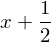

In [66]:
x + Rational(1,2)

[Gotchas and Pitfalls](http://docs.sympy.org/latest/gotchas.html#gotchas) 문서에 이런 상황을 피해나가는 몇가지 조언이 제시되어 있다.